## Observations and Insights 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [80]:
# Checking the number of mice.
unique_mice = mouse_study["Mouse ID"].unique()
mouseID_counts = mouse_study["Mouse ID"].value_counts()
total_mice = len(unique_mice)
mouseID_counts


g989    13
x822    10
r701    10
x581    10
c559    10
        ..
f932     1
o848     1
n482     1
u153     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989"]


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_ID_index = mouse_study.set_index('Mouse ID')

clean_mouse_study = mouse_ID_index.drop(['g989']).reset_index()

clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Checking the number of mice in the clean DataFrame.

unique = clean_mouse_study['Mouse ID'].unique()
len(unique)

248

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_data = clean_mouse_study.groupby(['Drug Regimen']).mean()
median_data = clean_mouse_study.groupby(['Drug Regimen']).median()
dev_data = clean_mouse_study.groupby(['Drug Regimen']).std()
sem_data = clean_mouse_study.groupby(['Drug Regimen']).sem()
var_data = clean_mouse_study.groupby(['Drug Regimen']).var()

mean_tumor = mean_data["Tumor Volume (mm3)"]
median_tumor = median_data["Tumor Volume (mm3)"]
dev_tumor = dev_data["Tumor Volume (mm3)"]
sem_tumor = sem_data["Tumor Volume (mm3)"]
var_tumor = var_data["Tumor Volume (mm3)"]

regimen_summary = pd.DataFrame({"Mean Tumor Volume(mm3)": mean_tumor, 
                              "Median Tumor Volume(mm3)": median_tumor, 
                              "St.Dev Tumor Volume": dev_tumor, 
                               "SEM Tumor Volume": sem_tumor, 
                               "Variance Tumor Volume": var_tumor})

regimen_summary
    
    





,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),St.Dev Tumor Volume,SEM Tumor Volume,Variance Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary2 = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean',
                                                                                          'median', 'std', 
                                                                                          'sem', 'var'])
regimen_summary2


,mean,median,std,sem,var
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar and Pie Charts

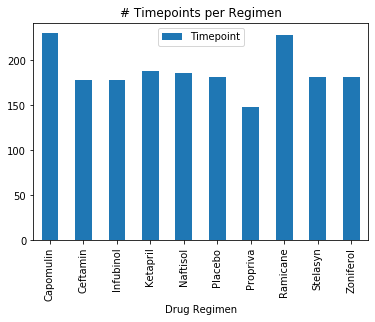

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_timepoints = clean_mouse_study.groupby(['Drug Regimen'])["Timepoint"].count()
regimen_timepoints_df = pd.DataFrame(regimen_timepoints)
regimen_timepoints_df.plot(kind='bar', title="# Timepoints per Regimen")


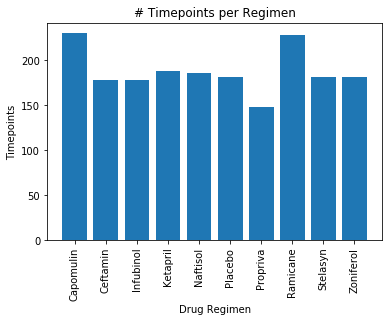

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

    
plt.bar(regimen_timepoints_df.index, regimen_timepoints_df["Timepoint"], align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("# Timepoints per Regimen")
plt.show()

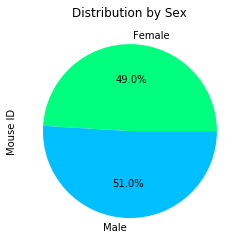

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = clean_mouse_study.groupby(['Sex'])['Mouse ID'].count()
sex_count.plot(kind='pie', title='Distribution by Sex', autopct='%1.1f%%', colors=['springgreen','deepskyblue'])

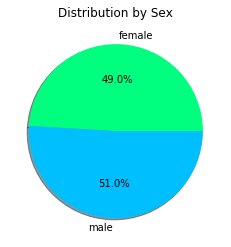

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['female', 'male']
colors = ['springgreen', 'deepskyblue']
plt.pie(sex_count, explode=None, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.title('Distribution by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol_df = pd.merge(max_timepoint_df, clean_mouse_study, on=["Mouse ID", "Timepoint"])
tumor_vol_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [92]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
     # add subset 
    
for value in treatments: 
    final_vol = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"] == value, "Tumor Volume (mm3)"]
    tumor_vol_data.append(final_vol)
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(value)
    print(f"The interquartile range for {value} is: {iqr}")
    print(f"The upper bound for {value} is: {upper_bound}")
    print(f"The lower bound for {value}: {lower_bound}")
    print(f"Potential outliers for {value} are: {outliers}")
    print("---------------------")
    
    # Determine outliers using upper and lower bounds


Capomulin
The interquartile range for Capomulin is: 7.781863460000004
The upper bound for Capomulin is: 51.83201549
The lower bound for Capomulin: 20.70456164999999
Potential outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Ramicane
The interquartile range for Ramicane is: 9.098536719999998
The upper bound for Ramicane is: 54.30681135
The lower bound for Ramicane: 17.912664470000003
Potential outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Infubinol
The interquartile range for Infubinol is: 11.477135160000003
The upper bound for Infubinol is: 82.74144559000001
The lower bound for Infubinol: 36.83290494999999
Potential outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
---------------------
Ceftamin
The interquartile range for Ceftamin is: 15.577752179999997
The upper bound for Ceftamin is: 87.66645829999999
The lower bound for Ceftamin: 25.355449

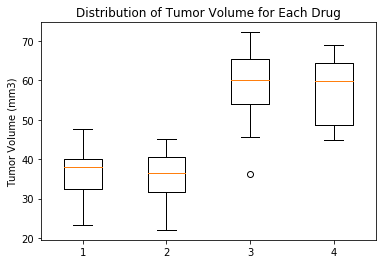

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
flierprops = dict(marker='o')
ax1.set_title('Distribution of Tumor Volume for Each Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()



## Line and Scatter Plots

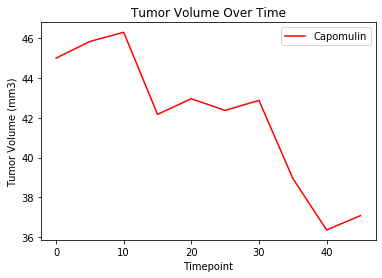

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#looking for a mouse to use
cap_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
cap_mouse_list = cap_df["Mouse ID"].unique()
#cap_mouse_list 

g288_df = cap_df.loc[cap_df["Mouse ID"] == "g288"]

volume = g288_df["Tumor Volume (mm3)"]
time = g288_df["Timepoint"]

plt.plot(time, volume, color="red", label="Capomulin")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

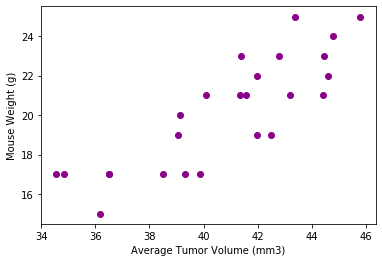

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_avg = cap_df.groupby(['Mouse ID']).mean()

avg_tumor_vol = cap_avg["Tumor Volume (mm3)"]
avg_mouse_weight = cap_avg["Weight (g)"]

plt.scatter(avg_tumor_vol, avg_mouse_weight, color="darkmagenta")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


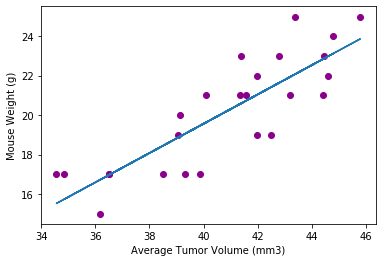

In [99]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor_vol, avg_mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(avg_tumor_vol, avg_mouse_weight)

pe_fit = pe_slope * avg_tumor_vol + pe_int


plt.scatter(avg_tumor_vol, avg_mouse_weight, color="darkmagenta")
plt.plot(avg_tumor_vol, pe_fit)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()
